In [10]:
from typing_extensions import TypedDict
from langgraph.graph import StateGraph, START, END
from IPython.display import Image, display

class State(TypedDict):
    topic: set
    character: str
    setting: str
    premise: str
    story_intro: str

In [11]:
from langchain_openai import ChatOpenAI

llm = ChatOpenAI(model = "gpt-4o")

In [ ]:
def generate_characters(state: State):
    """ 
    Generate character descriptions
    """
    msg = llm.invoke(f"Create two character names and breif traits for a story about {state["topic"]}")
    return {"character":msg.content}

def generate_setting(state: State):
    """Generate a story setting"""
    msg = llm.invoke(f"Describe a vivd setting for a story about {state["topic"]}")
    return {"setting":msg.content}

def generate_premise(state: State):
    """Generate a story premise"""
    msg = llm.invoke(f"write a one-sentence plot premise for a story about {state["topic"]}")
    return {"premise":msg.content}


def combine_elements(state:State):
    msg = llm.invoke(
        f"Write a short story introduction using these elements:\n"
        f"Character: {state["character"]}\n"
        f"Setting: {state["setting"]}\n"
        f"Premise: {state["premise"]}"
    )
    return {"story_intro":msg.content}

In [13]:
from IPython.display import Image, display
from langgraph.graph import StateGraph, START, END

graph = StateGraph(State)
graph.add_node("character", generate_characters)
graph.add_node("setting", generate_setting)
graph.add_node("premise", generate_premise)
graph.add_node("combine", combine_elements)


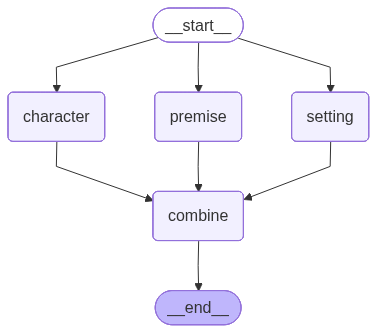

In [14]:
graph.add_edge(START, "character")
graph.add_edge(START, "setting")
graph.add_edge(START, "premise")
graph.add_edge("character", "combine")
graph.add_edge("setting", "combine")
graph.add_edge("premise", "combine")
graph.add_edge("combine", END)

compile_graph = graph.compile()
graph_image = compile_graph.get_graph().draw_mermaid_png()
display(Image(graph_image))

In [15]:
compile_graph.invoke({"topic":"time travel"})

{'topic': 'time travel',
 'character': "Certainly! Here are two character names with brief traits for a time travel story:\n\n1. **Elara Quinn**  \n   - **Traits**: Curious, Adventurous, Quick-Witted  \n   - **Background**: Elara is a brilliant physicist and an ingenious inventor who has always been fascinated by the concept of time travel. Her innovative mind and keen problem-solving skills make her the driving force behind the creation of a portable time travel device. She is fiercely independent and driven by a desire to unlock the mysteries of the past and future, often letting her curiosity lead her into uncharted territories.\n\n2. **Kaleo Hargrove**  \n   - **Traits**: Resourceful, Compassionate, Skeptical  \n   - **Background**: Kaleo is a talented historian with a deep appreciation for the complexities of human culture and history. While initially skeptical of time travel, he becomes an invaluable ally to Elara due to his knowledge of historical events and languages. His resou